<a href="https://colab.research.google.com/github/karandomguy/PhishGuard/blob/main/Phishing_URL_Preprocessing_and_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! kaggle datasets download -d sid321axn/malicious-urls-dataset

malicious-urls-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
import pandas as pd

In [6]:
df = pd.read_csv('malicious-urls-dataset.zip',compression='zip')

In [7]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [8]:
df['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [9]:
df['type_numeric'] = df['type'].apply(lambda x: 0 if x == 'benign' else 1)

In [10]:
df

,url,type,type_numeric
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1


In [11]:
import re
#Checking if the domain contains the IP
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))


from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [12]:
df

,url,type,type_numeric,use_of_ip,abnormal_url
0,br-icloud.com.br,phishing,1,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,1
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,0,0


In [13]:
!pip install googlesearch-python

In [14]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))
df.head()

,url,type,type_numeric,use_of_ip,abnormal_url,google_index,count.
0,br-icloud.com.br,phishing,1,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,1,1,2


In [15]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [16]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))


def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL

df['url_length'] = df['url'].apply(lambda i: url_length(i))

#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

,url,type,type_numeric,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,...,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,1,0,0,1,2,0,0,0,...,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,1,2,0,0,2,...,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,1,2,0,0,3,...,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,1,1,3,1,0,1,...,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,1,1,2,0,0,1,...,1,0,1,1,3,235,23,0,22,199


In [17]:
!pip install tld


In [18]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['topldom'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['topldom_length'] = df['topldom'].apply(lambda i: tld_length(i))

In [19]:
df

,url,type,type_numeric,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,topldom,topldom_length
0,br-icloud.com.br,phishing,1,0,0,1,2,0,0,0,...,1,0,16,0,0,0,13,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,1,2,0,0,2,...,0,0,35,0,0,1,29,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,1,2,0,0,3,...,0,0,31,0,0,1,25,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,1,1,3,1,0,1,...,1,4,88,21,0,7,63,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,1,1,2,0,0,1,...,1,3,235,23,0,22,199,9,net,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,0,0,1,3,0,0,3,...,0,0,39,0,0,12,21,7,None,-1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,0,0,1,2,0,0,4,...,2,0,44,0,0,7,29,8,None,-1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,0,0,1,2,1,0,4,...,0,0,42,0,0,3,33,7,None,-1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,0,0,1,2,0,0,2,...,0,0,45,0,0,0,36,4,None,-1


In [20]:
df = df.drop("topldom",1)
df.columns

<ipython-input-20-df4e725fe6c4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("topldom",1)


Index(['url', 'type', 'type_numeric', 'use_of_ip', 'abnormal_url',
       'google_index', 'count.', 'count-www', 'count@', 'count_dir',
       'count_embed_domian', 'short_url', 'count-https', 'count-http',
       'count%', 'count?', 'count-', 'count=', 'url_length', 'hostname_length',
       'sus_url', 'count-digits', 'count-letters', 'fd_length',
       'topldom_length'],
      dtype='object')

In [21]:
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [22]:
# TARGET ENCODING

In [23]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = df['type'].apply(lambda x: 0 if x == 'benign' else 1)
df["type_code"].value_counts()

0    428103
1    223088
Name: type_code, dtype: int64

<ipython-input-24-464b16688f06>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True, linewidths=0.5)


<Axes: >

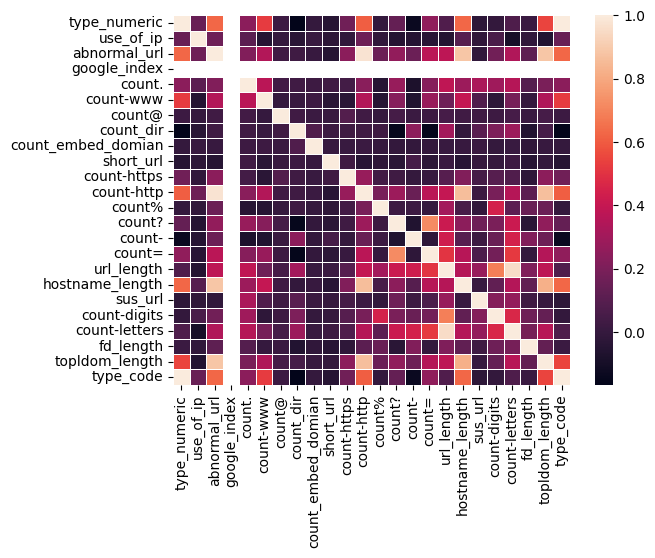

In [24]:
import seaborn as sns
sns.heatmap(df.corr(),cbar=True, linewidths=0.5)

In [25]:
df_relations=df.corr()

<ipython-input-25-8f2c980bcc56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_relations=df.corr()


In [27]:
import pandas as pd

# Assuming df_relations is a pandas DataFrame
for column in df_relations.columns:
    correlation_value = df_relations[column]['type_numeric']

    if correlation_value >= 0.2 and correlation_value != 1:
        print(f"Column Name: {column}, Correlation Value: {correlation_value}")

Column Name: abnormal_url, Correlation Value: 0.6298273832652552
Column Name: count., Correlation Value: 0.2388485849255571
Column Name: count-www, Correlation Value: 0.5240844683983205
Column Name: count-http, Correlation Value: 0.6074552198219105
Column Name: count=, Correlation Value: 0.25678948282931485
Column Name: hostname_length, Correlation Value: 0.6291460041661041
Column Name: topldom_length, Correlation Value: 0.5467124657463804


In [29]:
#Predictor Variables
# filtering out google_index as it has only 1 value
X = df[['abnormal_url','count.','count-www','count-http','count=',
       'hostname_length','topldom_length']]

#Target Variable
y = df['type_code']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [31]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=200,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'phishing']))

score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.90      0.97      0.93     85621
    phishing       0.92      0.78      0.85     44618

    accuracy                           0.90    130239
   macro avg       0.91      0.88      0.89    130239
weighted avg       0.91      0.90      0.90    130239

accuracy:   0.904


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
target_names = ['benign', 'phishing']
print(classification_report(y_test, y_pred_lr, target_names=target_names))
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy: %0.3f" % accuracy)


              precision    recall  f1-score   support

      benign       0.88      0.92      0.90     85621
    phishing       0.83      0.77      0.80     44618

    accuracy                           0.87    130239
   macro avg       0.85      0.84      0.85    130239
weighted avg       0.86      0.87      0.86    130239

Accuracy: 0.865


In [33]:
import xgboost as xgb
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)
print(classification_report(y_test,y_pred_x,target_names=target_names))

score = metrics.accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.90      0.97      0.93     85621
    phishing       0.92      0.78      0.85     44618

    accuracy                           0.90    130239
   macro avg       0.91      0.87      0.89    130239
weighted avg       0.90      0.90      0.90    130239

accuracy:   0.903


In [34]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(objective='binary',boosting_type= 'gbdt',n_jobs = 5,
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=target_names))

score = metrics.accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 178470, number of negative: 342482
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342584 -> initscore=-0.651799
[LightGBM] [Info] Start training from score -0.651799
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

      benign       0.90      0.97      0.93     85621
    phishing       0.92      0.78      0.85     44618

    accuracy                           0.90    130239
   macro avg       0.91      0.87      0.89    130239
weighted avg       0.90     

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report


nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb, target_names=['benign', 'phishing']))
score = metrics.accuracy_score(y_test, y_pred_nb)
print("accuracy:   %0.3f" % score)


              precision    recall  f1-score   support

      benign       0.90      0.87      0.89     85621
    phishing       0.77      0.82      0.80     44618

    accuracy                           0.86    130239
   macro avg       0.84      0.85      0.84    130239
weighted avg       0.86      0.86      0.86    130239

accuracy:   0.856


In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
rf_lda = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf_lda.fit(X_train_lda, y_train)
y_pred_rf_lda = rf_lda.predict(X_test_lda)
print("Classification Report (LDA-transformed data):")
print(classification_report(y_test, y_pred_rf_lda, target_names=['benign', 'phishing']))
score_lda = metrics.accuracy_score(y_test, y_pred_rf_lda)
print("Accuracy (LDA-transformed data): %0.3f" % score_lda)


Classification Report (LDA-transformed data):
              precision    recall  f1-score   support

      benign       0.90      0.97      0.93     85621
    phishing       0.92      0.78      0.85     44618

    accuracy                           0.90    130239
   macro avg       0.91      0.87      0.89    130239
weighted avg       0.90      0.90      0.90    130239

Accuracy (LDA-transformed data): 0.903


In [37]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  90.37%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85621
           1       0.92      0.78      0.85     44618

    accuracy                           0.90    130239
   macro avg       0.91      0.88      0.89    130239
weighted avg       0.91      0.90      0.90    130239

             Confusion_matrix 


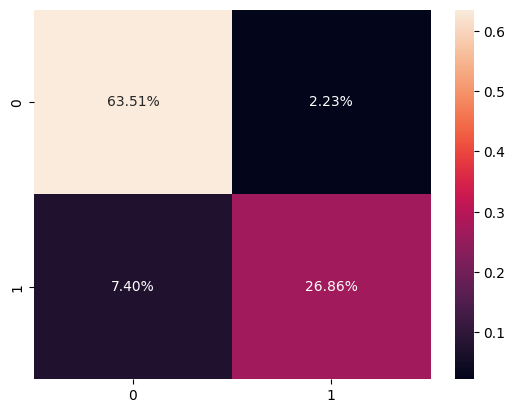

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  90.38%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85621
           1       0.92      0.78      0.85     44618

    accuracy                           0.90    130239
   macro avg       0.91      0.88      0.89    130239
weighted avg       0.91      0.90      0.90    130239

             Confusion_matrix 


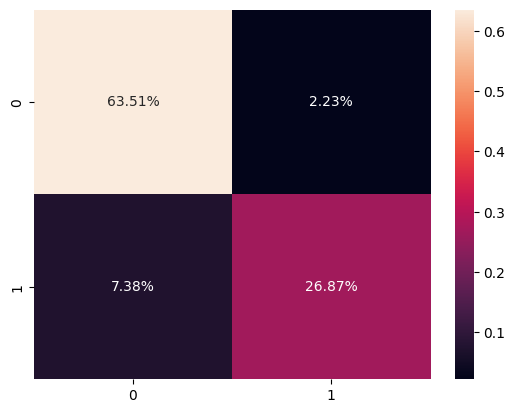

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  88.44%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     85621
           1       0.86      0.79      0.82     44618

    accuracy                           0.88    130239
   macro avg       0.88      0.86      0.87    130239
weighted avg       0.88      0.88      0.88    130239

             Confusion_matrix 


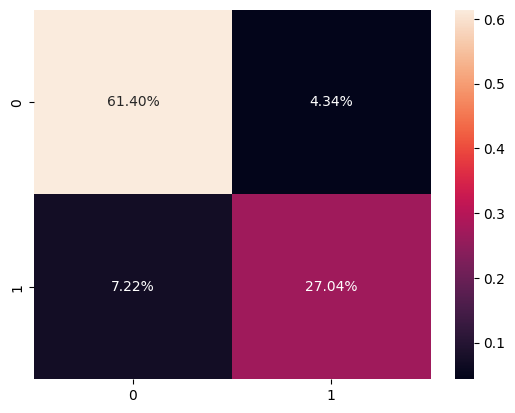

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
Test Accuracy :  85.46%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.95      0.90     85621
           1       0.88      0.66      0.76     44618

    accuracy                           0.85    130239
   macro avg       0.86      0.81      0.83    130239
weighted avg       0.86      0.85      0.85    130239

             Confusion_matrix 


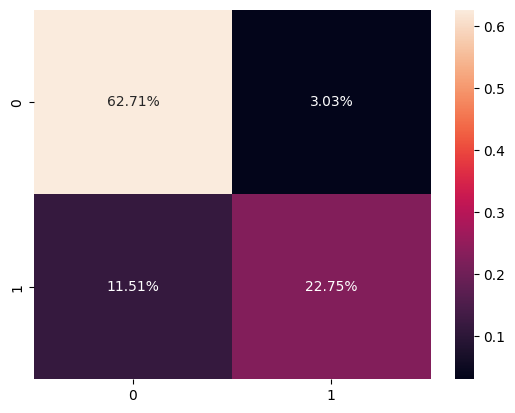

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  90.38%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85621
           1       0.92      0.78      0.85     44618

    accuracy                           0.90    130239
   macro avg       0.91      0.88      0.89    130239
weighted avg       0.91      0.90      0.90    130239

             Confusion_matrix 


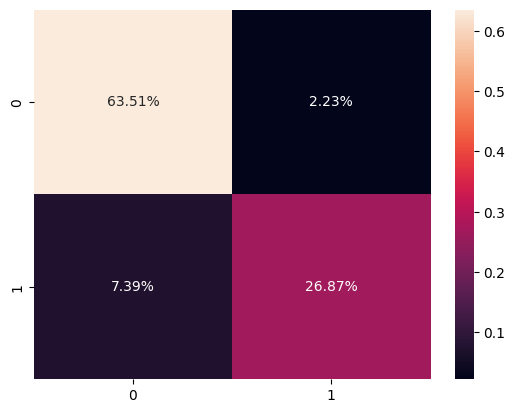

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  85.64%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     85621
           1       0.77      0.82      0.80     44618

    accuracy                           0.86    130239
   macro avg       0.84      0.85      0.84    130239
weighted avg       0.86      0.86      0.86    130239

             Confusion_matrix 


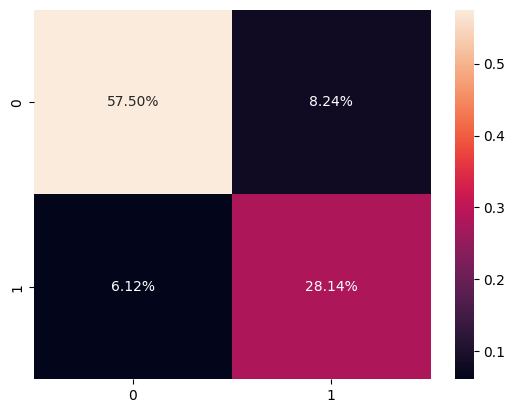

###################- End -###################


In [38]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [39]:
import joblib
joblib.dump(rf, 'best_pipeline_url.pkl')

['best_pipeline_url.pkl']